In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# %load_ext rpy2.ipython

random_state = 1337

In [3]:
df = pd.read_csv('../../data/processed/terran_1984_mar-05-2021_174444.csv', index_col=0)

drop_cols = ['player','frame','race']
df.drop(columns=drop_cols, inplace=True)

categorical_columns = df.columns[[t in ['object','bool'] for t in df.dtypes]]
continuous_columns = df.columns.difference(categorical_columns)

df.head()

,match_id,map_name,region,game_length,enemy_race,ap30s,second,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,armory,autoturret,banshee,barracks,barrackstechlab,barracksreactor,battlecruiser,bunker,commandcenter,cyclone,engineeringbay,factory,factoryreactor,factorytechlab,fusioncore,ghost,ghostacademy,hellion,liberator,marauder,marine,medivac,missileturret,mule,nuke,orbitalcommand,planetaryfortress,raven,reactor,reaper,refinery,scv,sensortower,siegetank,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,viking,warhound,widowmine,win
0,0,World of Sleepers LE,us,437,P,0.0,0,12,12.0,15.0,50,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,True
1,0,World of Sleepers LE,us,437,P,117.6,30,13,14.0,15.0,50,727,150,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,1,0,0,0,0,0,True
2,0,World of Sleepers LE,us,437,P,197.4,60,15,16.0,23.0,65,727,200,1250,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,1,0,0,0,0,0,True
3,0,World of Sleepers LE,us,437,P,200.2,90,17,18.0,23.0,135,867,275,1350,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,0,0,0,0,0,1,0,0,0,0,0,True
4,0,World of Sleepers LE,us,437,P,149.8,120,18,19.0,23.0,405,755,200,1475,0,0,48,179,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,0,0,0,0,0,1,0,0,0,0,0,True


In [4]:
matched_df = df.groupby(df['match_id']).head(1)
print('Number of matches in this dataframe:', len(matched_df))

Number of matches in this dataframe: 1984


In [5]:
maps = ['Eternal Empire LE', 'Ever Dream LE', 'Deathaura LE']
for enemy_race in ['P','T','Z']:
    for map_name in maps:
        print(len(matched_df[(matched_df.enemy_race == enemy_race) & (matched_df.map_name == map_name)]), enemy_race, map_name)

88 P Eternal Empire LE
83 P Ever Dream LE
56 P Deathaura LE
68 T Eternal Empire LE
66 T Ever Dream LE
34 T Deathaura LE
65 Z Eternal Empire LE
67 Z Ever Dream LE
53 Z Deathaura LE


In [6]:
indexed_df = matched_df[(matched_df.enemy_race == 'Z') & (matched_df.map_name == 'Ever Dream LE')]

In [7]:
match_indexes = indexed_df.match_id.index.to_list()
all_indexes = matched_df.match_id.index.to_list()

pvz_map_df = pd.DataFrame()
pvz_indexes = []

for i, match_index in enumerate(all_indexes):
    if match_index in match_indexes:
        pvz_indexes.append((match_index, all_indexes[i+1]))
        pvz_map_df = pvz_map_df.append(df.iloc[match_index:all_indexes[i+1],:])
        # print(match_index, all_indexes[i+1])

In [8]:
pvz_map_df.drop(columns=['enemy_race','map_name'], inplace=True)
pvz_map_df.head()

,match_id,region,game_length,ap30s,second,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,armory,autoturret,banshee,barracks,barrackstechlab,barracksreactor,battlecruiser,bunker,commandcenter,cyclone,engineeringbay,factory,factoryreactor,factorytechlab,fusioncore,ghost,ghostacademy,hellion,liberator,marauder,marine,medivac,missileturret,mule,nuke,orbitalcommand,planetaryfortress,raven,reactor,reaper,refinery,scv,sensortower,siegetank,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,viking,warhound,widowmine,win
14269,412,kr,748,0.0,0,12,12.0,15.0,50,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,False
14270,412,kr,748,121.8,30,13,14.0,15.0,40,699,150,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,1,0,0,0,0,0,False
14271,412,kr,748,159.6,60,15,16.0,23.0,70,783,200,1250,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,1,0,0,0,0,0,False
14272,412,kr,748,142.8,90,17,18.0,23.0,185,867,275,1350,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,0,0,0,0,0,1,0,0,0,0,0,False
14273,412,kr,748,117.6,120,18,19.0,23.0,425,839,200,1475,0,0,48,179,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,0,0,0,0,0,1,0,0,0,0,0,False


In [9]:
test_length = int(len(pvz_indexes)*.2)
pvz_map_df_indexes = pvz_map_df.groupby(pvz_map_df['match_id']).head(1)
test_indexes = pvz_map_df_indexes.sample(test_length).match_id.index.to_list()

test_df = pd.DataFrame()
train_df = pd.DataFrame()
all_pvz_map_df_indexes = pvz_map_df_indexes.match_id.index.to_list()

for i, match_index in enumerate(all_pvz_map_df_indexes):
    match_index2 = all_indexes[all_indexes.index(match_index)+1]

    if match_index in test_indexes:
        test_df = test_df.append(pvz_map_df.loc[match_index:match_index2,:])
    else:
        train_df = train_df.append(pvz_map_df.loc[match_index:match_index2,:])

In [10]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

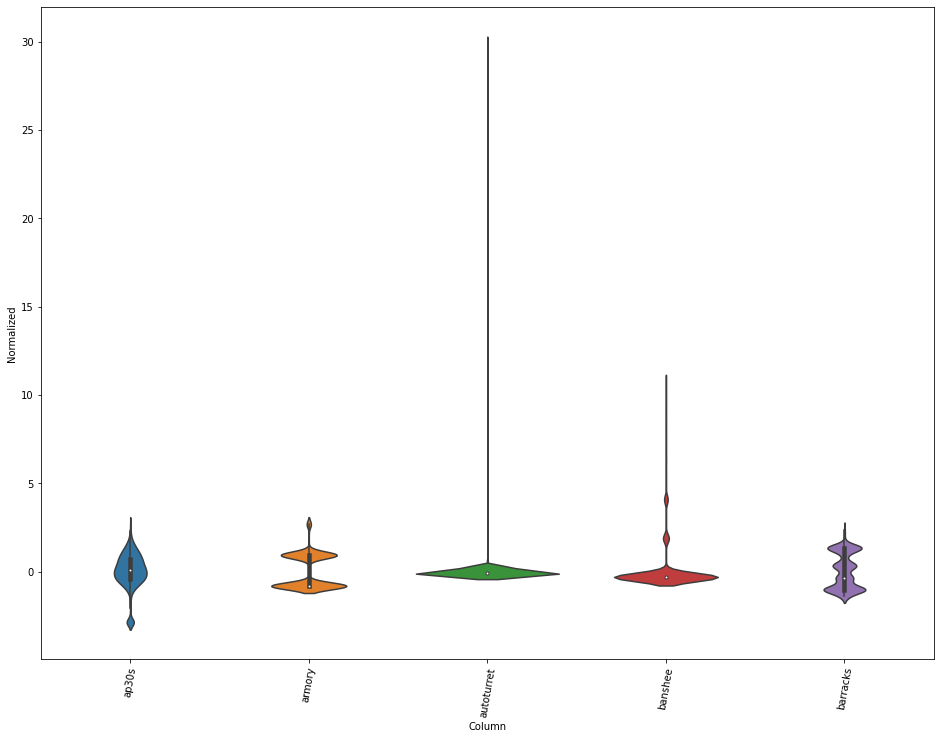

In [11]:
df_std = (pvz_map_df - train_mean) / train_std
_cols = ['ap30s','armory','autoturret','banshee','barracks']
df_std = df_std.loc[:, _cols].melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(16, 12))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
ax.set_xticklabels(_cols, rotation=80)
plt.show()

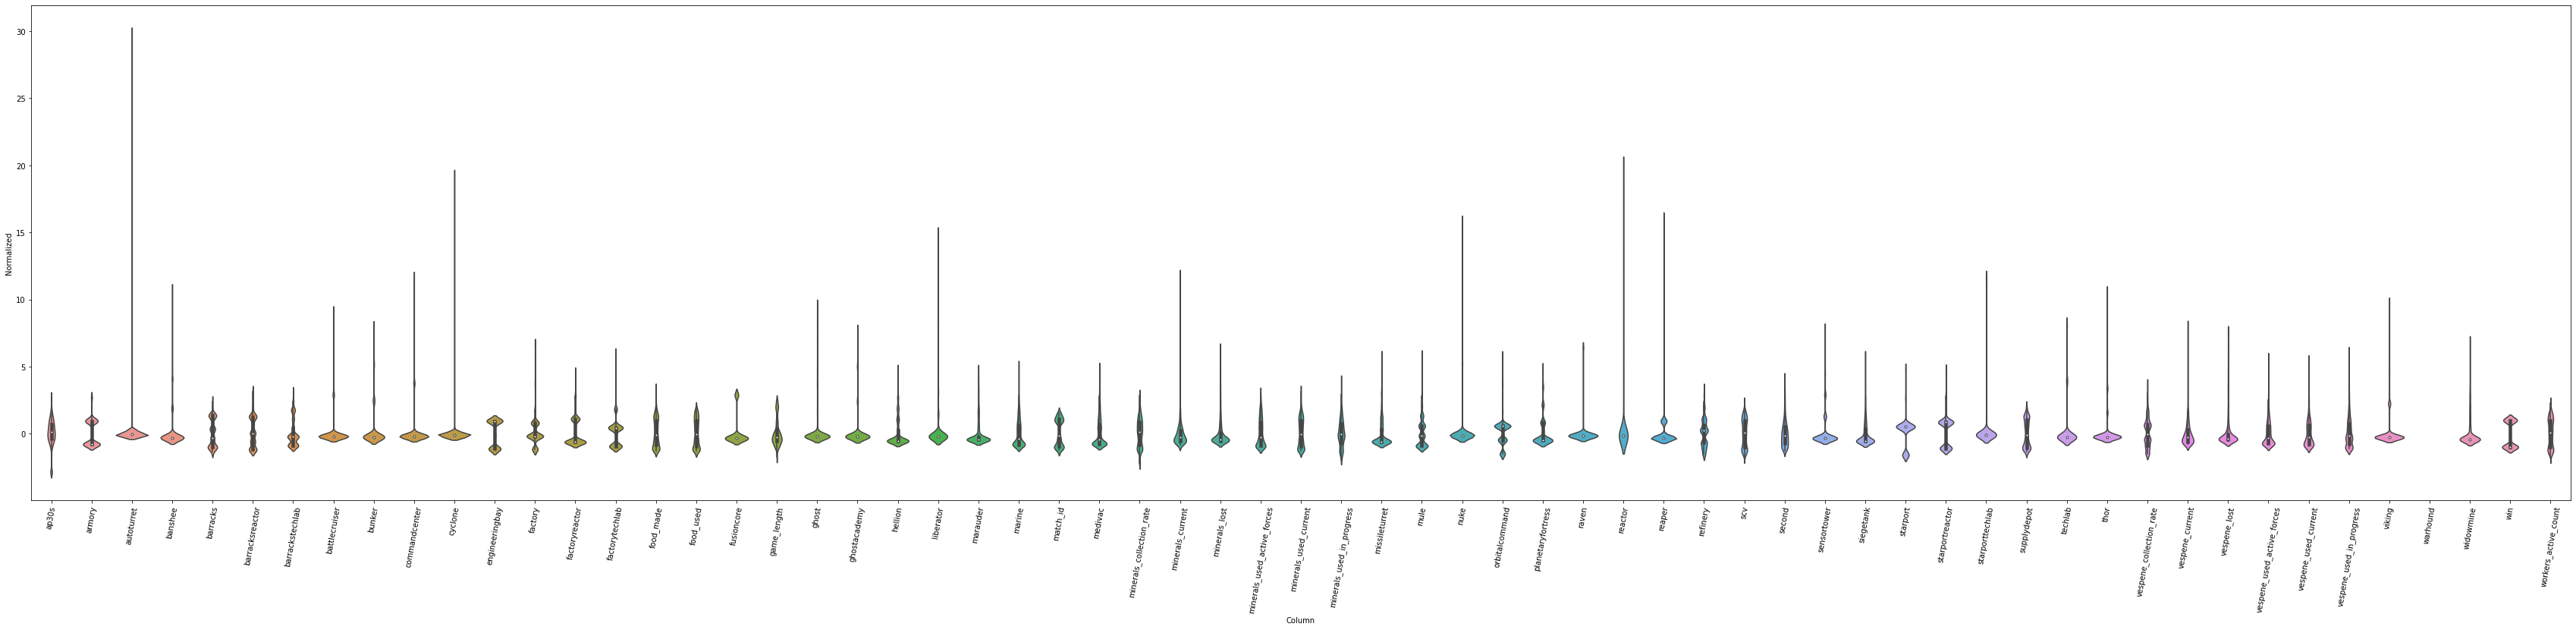

In [12]:
df_std = (pvz_map_df - train_mean) / train_std
df_std = df_std.loc[:,df_std.columns.difference(['region'])].melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(60, 12))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
ax.set_xticklabels(pvz_map_df.columns.difference(['region']), rotation=80)
plt.show()

In [13]:
grouped_df = pvz_map_df.loc[:, ['match_id', 'game_length', 'region', 'win']]
grouped_df = grouped_df.groupby(grouped_df['match_id']).head(1)

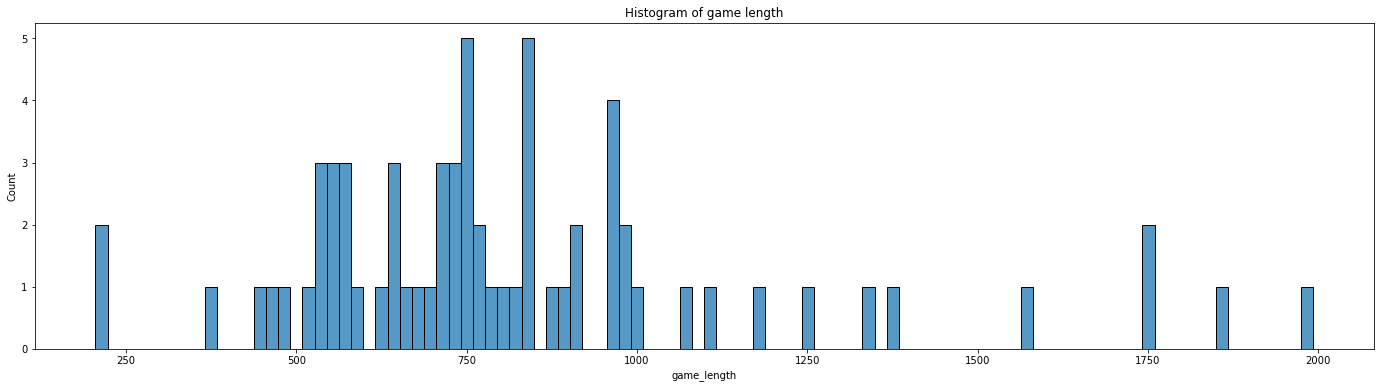

In [14]:
plt.figure(figsize=(24, 6))
ax = sns.histplot(data=grouped_df, x='game_length', bins=100)
plt.title('Histogram of game length')

plt.show()

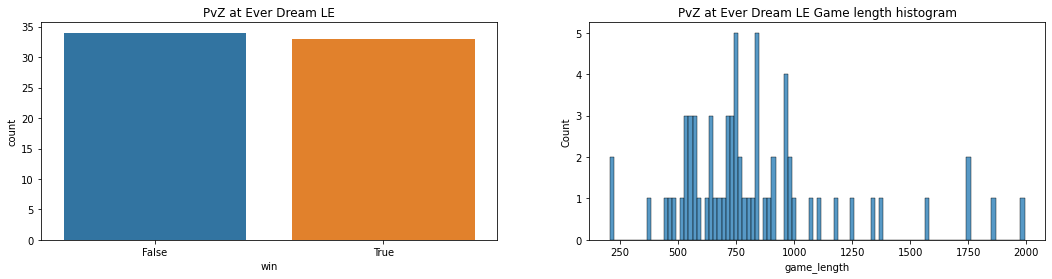

In [15]:
fig = plt.figure(figsize=(18,4))

ax = fig.add_subplot(1,2,1)
ax.title.set_text('PvZ at Ever Dream LE')
ax = sns.countplot(data=grouped_df, x='win', ax=ax)

ax = fig.add_subplot(1,2,2)
ax.title.set_text('PvZ at Ever Dream LE Game length histogram')
sns.histplot(data=grouped_df, x='game_length', bins=100, ax=ax)

plt.show()

In [16]:
counts = df.scv.value_counts()
pd.DataFrame(counts).T

,19,18,15,12,13,23,17,21,25,20,47,46,24,48,22,68,30,44,28,69,26,43,45,70,34,65,49,67,66,62,27,59,71,51,38,63,42,50,60,40,61,72,64,39,41,52,58,74,73,54,33,37,55,36,53,29,56,32,57,31,35,75,76,77,78,81,79,80,82,83,16,84,85,87,86,14,0,89,88,90,93,9,4,8,11,1,2,91,5,6,3,7,95,92,97,10,96,94,104,103,102,99,101
scv,2711,2114,2110,2027,2018,1982,1955,1600,1523,1467,1098,1076,1069,1041,1024,1018,1000,996,990,990,957,954,945,944,940,929,921,912,902,889,885,876,875,865,864,863,857,850,846,842,836,830,826,820,819,806,804,798,789,787,775,772,758,747,743,733,730,729,715,703,685,678,646,622,587,457,456,436,326,258,247,178,144,108,102,89,88,67,59,43,32,31,28,26,25,23,20,19,18,17,16,15,13,13,12,11,5,5,4,3,2,1,1


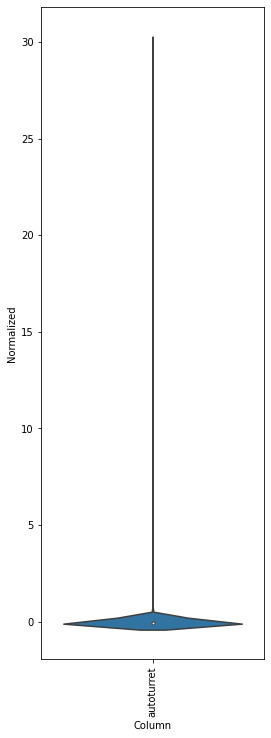

In [17]:
df_std = (pvz_map_df - train_mean) / train_std
df_std = df_std.loc[:,['autoturret']].melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(4, 12))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
ax.set_xticklabels(['autoturret'], rotation=90)
plt.show()

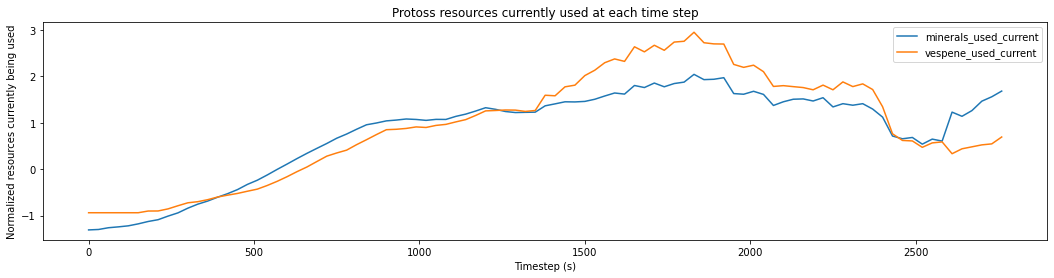

In [18]:
df_std = (pvz_map_df - train_mean) / train_std
df_std['second'] = pvz_map_df.second


plt.figure(figsize=(18,4))

plt.plot(pd.DataFrame(df_std[['second','minerals_used_current']].groupby(['second'])['minerals_used_current'].mean()), label='minerals_used_current')
plt.plot(pd.DataFrame(df_std[['second','vespene_used_current']].groupby(['second'])['vespene_used_current'].mean()), label='vespene_used_current')
plt.legend()
plt.title('Protoss resources currently used at each time step')
plt.ylabel('Normalized resources currently being used')
plt.xlabel('Timestep (s)')

plt.show()

In [19]:
df_std = (pvz_map_df - train_mean) / train_std
df_std['second'] = pvz_map_df.second
df_std['win'] = pvz_map_df.win

df_std.head()

,ap30s,armory,autoturret,banshee,barracks,barracksreactor,barrackstechlab,battlecruiser,bunker,commandcenter,cyclone,engineeringbay,factory,factoryreactor,factorytechlab,food_made,food_used,fusioncore,game_length,ghost,ghostacademy,hellion,liberator,marauder,marine,match_id,medivac,minerals_collection_rate,minerals_current,minerals_lost,minerals_used_active_forces,minerals_used_current,minerals_used_in_progress,missileturret,mule,nuke,orbitalcommand,planetaryfortress,raven,reactor,reaper,refinery,region,scv,second,sensortower,siegetank,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,vespene_collection_rate,vespene_current,vespene_lost,vespene_used_active_forces,vespene_used_current,vespene_used_in_progress,viking,warhound,widowmine,win,workers_active_count
14269,-2.859303,-0.798515,-0.052025,-0.298136,-1.344702,-1.197567,-0.887333,-0.203131,-0.252673,-0.196013,-0.10452,-1.134052,-1.166694,-0.629502,-0.939838,-1.285245,-1.310035,-0.347221,-0.467566,-0.199662,-0.214452,-0.547275,-0.211627,-0.446911,-0.865409,-1.211454,-0.760043,-2.208572,-0.689425,-0.536563,-1.010573,-1.309749,-1.878683,-0.602448,-0.914869,-0.128752,-1.508017,-0.50842,-0.156135,-0.157793,-0.330112,-1.548910,NaN,-1.559816,0,-0.349726,-0.560917,-1.58968,-1.09065,-0.086559,-1.352464,-0.255943,-0.23997,-1.485772,-0.799184,-0.4584,-0.799045,-0.939246,-1.091319,-0.271168,NaN,-0.426883,False,-1.559816
14270,-0.487870,-0.798515,-0.052025,-0.298136,-1.344702,-1.197567,-0.887333,-0.203131,-0.252673,-0.196013,-0.10452,-1.134052,-1.166694,-0.629502,-0.939838,-1.285245,-1.275720,-0.347221,-0.467566,-0.199662,-0.214452,-0.547275,-0.211627,-0.446911,-0.865409,-1.211454,-0.760043,-1.344301,-0.720253,-0.536563,-1.010573,-1.300289,-1.483742,-0.602448,-0.914869,-0.128752,-1.508017,-0.50842,-0.156135,-0.157793,-0.330112,-1.548910,NaN,-1.508173,30,-0.349726,-0.560917,-1.58968,-1.09065,-0.086559,-1.193518,-0.255943,-0.23997,-1.485772,-0.799184,-0.4584,-0.799045,-0.939246,-1.091319,-0.271168,NaN,-0.426883,False,-1.508173
14271,0.248092,-0.798515,-0.052025,-0.298136,-1.006851,-1.197567,-0.887333,-0.203131,-0.252673,-0.196013,-0.10452,-1.134052,-1.166694,-0.629502,-0.939838,-1.174573,-1.241405,-0.347221,-0.467566,-0.199662,-0.214452,-0.547275,-0.211627,-0.446911,-0.865409,-1.211454,-0.760043,-1.240440,-0.627769,-0.536563,-1.010573,-1.262449,-1.352094,-0.602448,-0.914869,-0.128752,-1.508017,-0.50842,-0.156135,-0.157793,-0.330112,-1.548910,NaN,-1.404887,60,-0.349726,-0.560917,-1.58968,-1.09065,-0.086559,-1.193518,-0.255943,-0.23997,-1.485772,-0.799184,-0.4584,-0.799045,-0.939246,-1.091319,-0.271168,NaN,-0.426883,False,-1.404887
14272,-0.079002,-0.798515,-0.052025,-0.298136,-1.006851,-1.197567,-0.887333,-0.203131,-0.252673,-0.196013,-0.10452,-1.134052,-1.166694,-0.629502,-0.939838,-1.174573,-1.207089,-0.347221,-0.467566,-0.199662,-0.214452,-0.547275,-0.211627,-0.446911,-0.865409,-1.211454,-0.760043,-1.136579,-0.273245,-0.536563,-1.010573,-1.243529,-1.154624,-0.602448,-0.914869,-0.128752,-1.508017,-0.50842,-0.156135,-0.157793,-0.330112,-1.107927,NaN,-1.301601,90,-0.349726,-0.560917,-1.58968,-1.09065,-0.086559,-1.193518,-0.255943,-0.23997,-1.485772,-0.799184,-0.4584,-0.799045,-0.939246,-1.091319,-0.271168,NaN,-0.426883,False,-1.301601
14273,-0.569643,-0.798515,-0.052025,-0.298136,-1.006851,-1.197567,-0.887333,-0.203131,-0.252673,-0.196013,-0.10452,-1.134052,-1.166694,-0.629502,-0.939838,-1.174573,-1.189932,-0.347221,-0.467566,-0.199662,-0.214452,-0.547275,-0.211627,-0.446911,-0.865409,-1.211454,-0.760043,-1.171199,0.466631,-0.536563,-1.010573,-1.219879,-1.352094,-0.602448,-0.914869,-0.128752,-1.508017,-0.50842,-0.156135,-0.157793,-0.330112,-1.107927,NaN,-1.249958,120,-0.349726,-0.560917,-1.58968,-1.09065,-0.086559,-1.193518,-0.255943,-0.23997,-0.902064,-0.640966,-0.4584,-0.799045,-0.939246,-1.091319,-0.271168,NaN,-0.426883,False,-1.249958


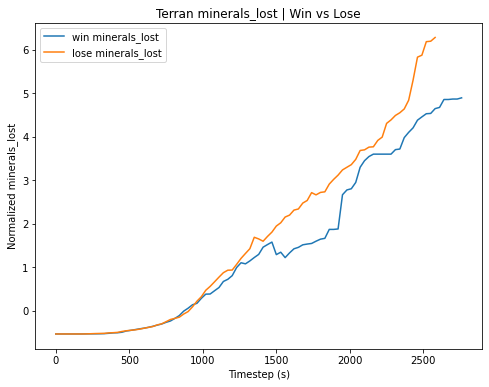

In [22]:
fig = plt.figure(figsize=(8,6))

not_col = 'minerals_lost'

ax = fig.add_subplot(111)
ax.title.set_text('Terran {} | Win vs Lose'.format(not_col))

plt.plot(pd.DataFrame(df_std[df_std.win == True][['second',not_col]].groupby(['second'])[not_col].mean()), label='win {}'.format(not_col))
plt.plot(pd.DataFrame(df_std[df_std.win == False][['second',not_col]].groupby(['second'])[not_col].mean()), label='lose {}'.format(not_col))

plt.ylabel('Normalized {}'.format(not_col))
plt.xlabel('Timestep (s)')

ax.legend()


plt.show()

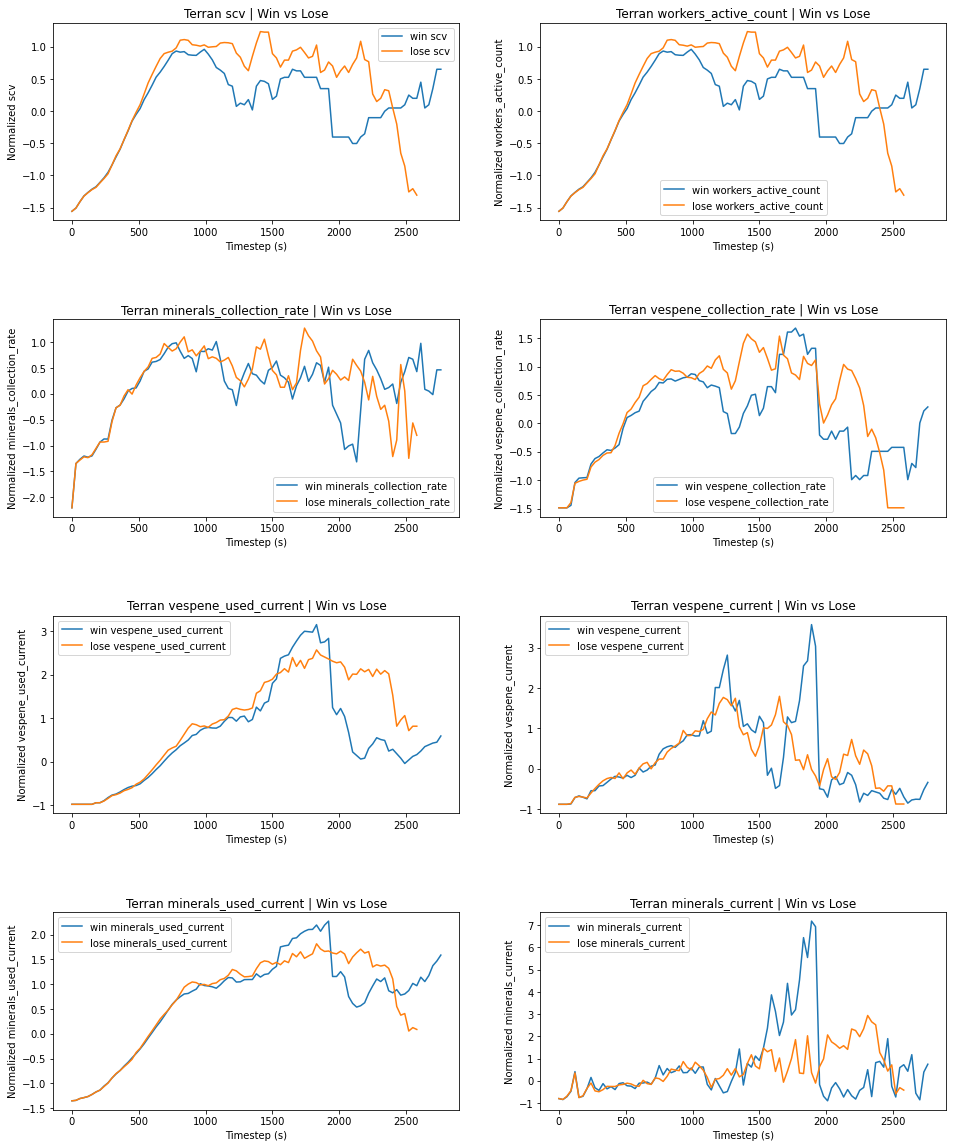

In [56]:
# row, col
shape = (4,2)
fig = plt.figure(figsize=(16,20))

_cols = ['scv','workers_active_count','minerals_collection_rate','vespene_collection_rate','vespene_used_current','vespene_current','minerals_used_current','minerals_current','ap30s']

_cols = [col for col in _cols if col != not_col]

for i, feature in enumerate(_cols):
    ax = fig.add_subplot(*shape,i+1)
    ax.title.set_text('Terran {} | Win vs Lose'.format(feature))
    plt.plot(pd.DataFrame(df_std[df_std.win == True][['second',feature]].groupby(['second'])[feature].mean()), label='win {}'.format(feature))
    plt.plot(pd.DataFrame(df_std[df_std.win == False][['second',feature]].groupby(['second'])[feature].mean()), label='lose {}'.format(feature))
    plt.ylabel('Normalized {}'.format(feature))
    plt.xlabel('Timestep (s)')
    ax.legend()


plt.subplots_adjust(hspace=.5)
plt.show()